# Stomble Assessment Task

### The required packages are loaded

In [177]:
import warnings
import itertools
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX



### The dataset is imported using the pd.read_csv() function


In [3]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv', sep=',')

### The head of the dataset is visualised

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389


### The unique country names are visualised.

In [34]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

### The data is described using describe() function.  

In [5]:
df.describe(include='all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
count,84,273,272.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02
unique,84,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Prince Edward Island,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,20.639516,23.165585,2.040293,2.399267,3.446886,5.249084,7.758242,10.721612,...,3.888738e+05,3.900295e+05,3.915956e+05,3.931893e+05,3.948042e+05,3.963028e+05,3.975792e+05,3.985970e+05,3.998421e+05,4.011260e+05
std,NaN,NaN,25.181450,73.696719,26.928183,27.026232,33.646272,46.828263,65.442780,88.174227,...,1.916296e+06,1.921683e+06,1.928703e+06,1.935534e+06,1.942748e+06,1.949537e+06,1.955266e+06,1.959629e+06,1.963952e+06,1.968885e+06
min,NaN,NaN,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,6.105887,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.270000e+02,9.280000e+02,9.330000e+02,9.350000e+02,9.350000e+02,9.350000e+02,9.350000e+02,9.350000e+02,9.350000e+02,9.370000e+02
50%,NaN,NaN,21.805100,20.972650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.180600e+04,1.183600e+04,1.190800e+04,1.210700e+04,1.211400e+04,1.244000e+04,1.257700e+04,1.257700e+04,1.286500e+04,1.286500e+04
75%,NaN,NaN,41.123000,84.497525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.626010e+05,1.632130e+05,1.639750e+05,1.647360e+05,1.655320e+05,1.662000e+05,1.668000e+05,1.672790e+05,1.673830e+05,1.681030e+05


### The data is subsetted to show the Australian data. 

In [6]:
df_aus = df[df["Country/Region"]=="Australia"]

In [7]:
df_aus.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,118,118,118,118,118,118,118,118,118,118
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,5123,5125,5129,5132,5134,5136,5138,5138,5139,5143
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,102,102,102,102,102,102,103,103,103,103
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1314,1315,1316,1317,1318,1320,1320,1320,1320,1320
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,603,603,605,606,606,606,606,606,606,608


## Dropping Latitude and Longitude

#### We will not be using Latitude and Longitude in our Time Series plot, hence they are dropped.

In [11]:
df_aus.drop(['Lat','Long'], axis=1, inplace=True)

In [33]:
df_aus.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,118,118,118,118,118,118,118,118,118,118
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,5123,5125,5129,5132,5134,5136,5138,5138,5139,5143
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,102,102,102,102,102,102,103,103,103,103
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,1314,1315,1316,1317,1318,1320,1320,1320,1320,1320
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,603,603,605,606,606,606,606,606,606,608


### Getting the number of covid cases in Australia as the sum of Covid cases in all provinces. 

In [51]:
ts_aus = df_aus.sum().values[2:]

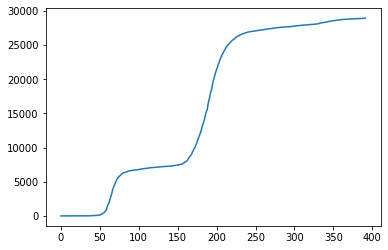

In [52]:
plt.plot(ts_aus)

### United States data is subsetted. 

In [35]:
df_usa = df[df["Country/Region"]=="US"]

In [36]:
df_usa.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
249,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,27007368,27097095,27192455,27287159,27392512,27492023,27575344,27640282,27694226,27756624


In [37]:
df_usa.drop(['Lat','Long'], axis=1, inplace=True)

In [38]:
df_usa.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
249,NaN,US,1,1,2,2,5,5,5,6,...,27007368,27097095,27192455,27287159,27392512,27492023,27575344,27640282,27694226,27756624


In [75]:
df_us = df_usa.iloc[0][2:].values

In [76]:
df_us 

array([1, 1, 2, 2, 5, 5, 5, 6, 6, 8, 8, 8, 11, 11, 11, 12, 12, 12, 12, 12,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 17,
       17, 25, 32, 55, 74, 107, 184, 237, 403, 519, 594, 782, 1147, 1586,
       2219, 2978, 3212, 4679, 6512, 9169, 13663, 20030, 26025, 34898,
       46136, 56755, 68837, 86693, 105383, 125013, 143912, 165987, 192301,
       224544, 256779, 289066, 321482, 351359, 382740, 413507, 444699,
       480640, 515055, 544185, 571440, 598370, 627151, 652591, 682626,
       715656, 743588, 769684, 799512, 825429, 854288, 887858, 920185,
       950580, 977081, 1000784, 1025361, 1051799, 1081019, 1115945,
       1143295, 1167592, 1191677, 1216208, 1240767, 1268179, 1295017,
       1320153, 1339020, 1358291, 1381238, 1401646, 1428464, 1453211,
       1477370, 1495733, 1518123, 1539130, 1561827, 1587593, 1611249,
       1632361, 1652428, 1671100, 1690750, 1709299, 1731621, 1756093,
       1779726, 1798713, 1816148, 1837651, 1857495, 1879144, 1904544,

In [81]:
df_us = df_us.astype(float)

### Time Series of United States is plotted. 

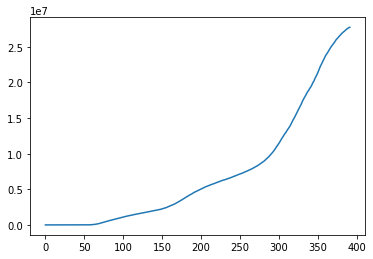

In [77]:
plt.close() 
plt.plot(df_us)

### To Forecast the number of Covid cases for Australia and USA for the next months (March - December) , we use  the ARIMA Model for prediction. We first plot the ACF and PACF plots to determine the coefficients.   

### Checking for stationarity

#### Since the time series is stationary, we need not stationarize it through differencing. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model. 


In [154]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [156]:
ts_log = (df_us)
ts_log


array([1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 2.0000000e+00,
       5.0000000e+00, 5.0000000e+00, 5.0000000e+00, 6.0000000e+00,
       6.0000000e+00, 8.0000000e+00, 8.0000000e+00, 8.0000000e+00,
       1.1000000e+01, 1.1000000e+01, 1.1000000e+01, 1.2000000e+01,
       1.2000000e+01, 1.2000000e+01, 1.2000000e+01, 1.2000000e+01,
       1.3000000e+01, 1.3000000e+01, 1.4000000e+01, 1.4000000e+01,
       1.4000000e+01, 1.4000000e+01, 1.4000000e+01, 1.4000000e+01,
       1.4000000e+01, 1.4000000e+01, 1.6000000e+01, 1.6000000e+01,
       1.6000000e+01, 1.6000000e+01, 1.6000000e+01, 1.6000000e+01,
       1.7000000e+01, 1.7000000e+01, 2.5000000e+01, 3.2000000e+01,
       5.5000000e+01, 7.4000000e+01, 1.0700000e+02, 1.8400000e+02,
       2.3700000e+02, 4.0300000e+02, 5.1900000e+02, 5.9400000e+02,
       7.8200000e+02, 1.1470000e+03, 1.5860000e+03, 2.2190000e+03,
       2.9780000e+03, 3.2120000e+03, 4.6790000e+03, 6.5120000e+03,
       9.1690000e+03, 1.3663000e+04, 2.0030000e+04, 2.6025000e

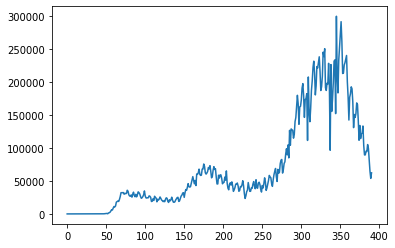

In [157]:
ts_log_diff = np.diff(ts_log)
plt.plot(ts_log_diff)

## Pacf and Acf Plots 

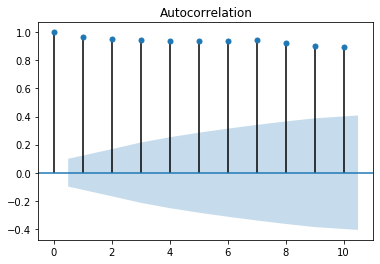

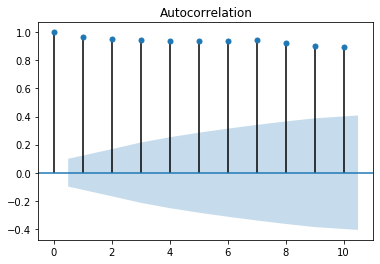

In [158]:
plot_acf(ts_log_diff,lags=10)

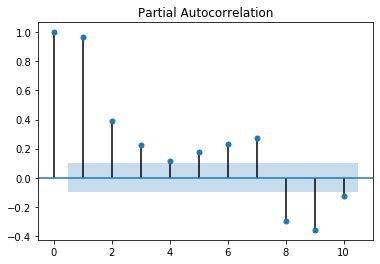

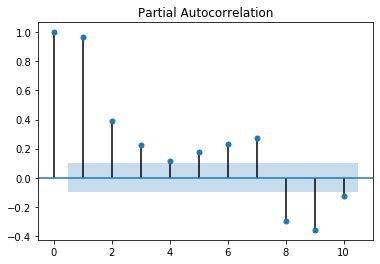

In [159]:
plot_pacf(ts_log_diff,lags=10)


 In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

### The ARIMA model is applied

In [160]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(ts_log_diff,order=(2,0,3))
results = mod.fit() 
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  391
Model:                     ARMA(2, 3)   Log Likelihood               -4354.044
Method:                       css-mle   S.D. of innovations          16526.642
Date:                Tue, 23 Feb 2021   AIC                           8722.089
Time:                        15:59:51   BIC                           8749.870
Sample:                             0   HQIC                          8733.100
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.099e+04   4.65e+04      1.525      0.127   -2.02e+04    1.62e+05
ar.L1.y        0.9083      2.299      0.395      0.693      -3.598       5.414
ar.L2.y        0.0856      2.286      0.037      0.9

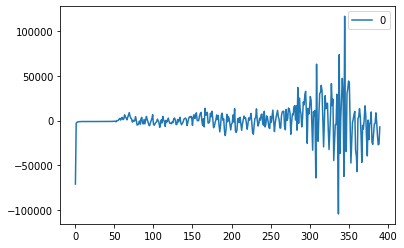

In [94]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

It is ensured that the residuals give a normal curve when plotted.

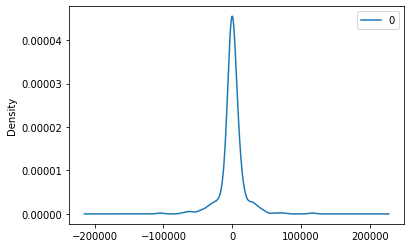

In [95]:
residuals.plot(kind='kde')


In [96]:
residuals.describe()

,0
count,391.000000
mean,226.905291
std,16908.220934
min,-104380.595279
25%,-3514.786995
50%,-544.827604
75%,4842.211045
max,116839.452978


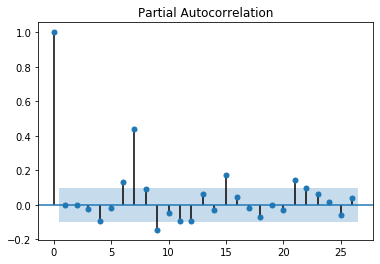

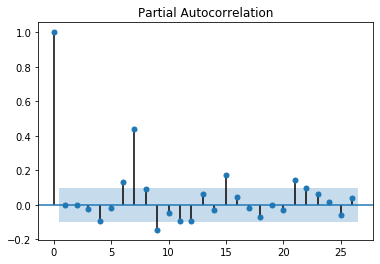

In [97]:
plot_pacf(residuals)

## Finally the model is forecasted for the next months. 

In [161]:
n=9
forecast,err,ci = results.forecast(steps=n,alpha=0.05)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='20/1/2020', periods=n, freq='MS'))

In [162]:
ci

array([[ 35280.71218645, 100063.95679372],
       [ 32426.55903607, 103803.54322473],
       [ 30104.74703324, 106175.49416056],
       [ 27952.53410716, 108358.20302569],
       [ 25933.07361615, 110409.65406819],
       [ 24028.55195115, 112345.84307026],
       [ 22224.26315644, 114181.63350873],
       [ 20508.51128634, 115928.70886218],
       [ 18871.76088852, 117596.60673754]])

In [178]:

ts_log_diff.plot(label='observed', figsize=(20, 15))
df_forecast.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast.index,
                ci[:,0],
                ci[:,1], color='b', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Covid-19 Cases')

plt.legend()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'plot'